# Plotting things

SMURFS implements quite a lot of different plotting mechanisms. So lets have a look at the different ways you can plot things with SMURFS. Lets first get some data and analyze it:

In [1]:
from smurfs import Smurfs

In [2]:
star = Smurfs(target_name='Gamma Doradus')

 Searching processed light curves for Gamma Doradus on mission(s) TESS ...  
 Resolving Gamma Doradus to TIC using MAST ... 
 TIC ID for Gamma Doradus: TIC 219234987 
 Short cadence observations available for Gamma Doradus. Downloading ... 


 Found processed light curve for Gamma Doradus! 
 Using TESS observations! Combining sectors ... 
 Total observation length: 78.32 days. 
 Duty cycle for Gamma Doradus: 84.45% 


In [3]:
star.run(snr=4,window_size=2)

 Periodogramm from 0.0 1 / d to 360.0 1 / d 
 Starting frequency extraction. 
 Skip similar:  Deactivated  
 Chancel after 10 similar:  Activated  
 Window size: 2 
 Number of extended frequencies: 0 
 Nyquist frequency: 360.0 1 / d 
 List of frequencies, amplitudes, phases, S/N 
 F0   1.363601+/-0.000004 1 / d   0.01056+/-0.00008 mag   0.5105+/-0.0011   14.621917538996478  
 F1   1.3214676+/-0.0000031 1 / d   0.01011+/-0.00006 mag   0.8538+/-0.0009   17.646618113213755  
 F2   1.470851+/-0.000007 1 / d   0.002806+/-0.000035 mag   0.8600+/-0.0020   7.578344472336695  
 F3   1.878144+/-0.000007 1 / d   0.002413+/-0.000032 mag   0.5167+/-0.0021   6.717143847007492  
 F4   1.385307+/-0.000007 1 / d   0.002228+/-0.000030 mag   0.1748+/-0.0022   7.318522855378772  
 F5   0.316642+/-0.000008 1 / d   0.002030+/-0.000028 mag   0.2544+/-0.0022   5.597834999218046  
 F6   1.417226+/-0.000008 1 / d   0.001813+/-0.000027 mag   0.3842+/-0.0024   6.523381016995975  
 F7   2.742524+/-0.000008 1 / d  

## Plotting the light curve

Now, if you want to plot the light curve, you can call the plot_lc method

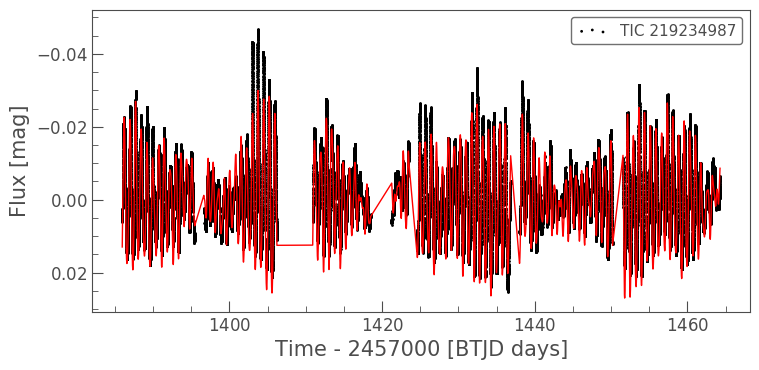

In [4]:
star.plot_lc()

In black you can see the data set, in red the model.

In the backend, SMURFS uses the lightkurve.LightCurve.plot method to plot the light curve. You have access to all the parameters for these objects. We can make use of this if we want to plot the light curve without the model:

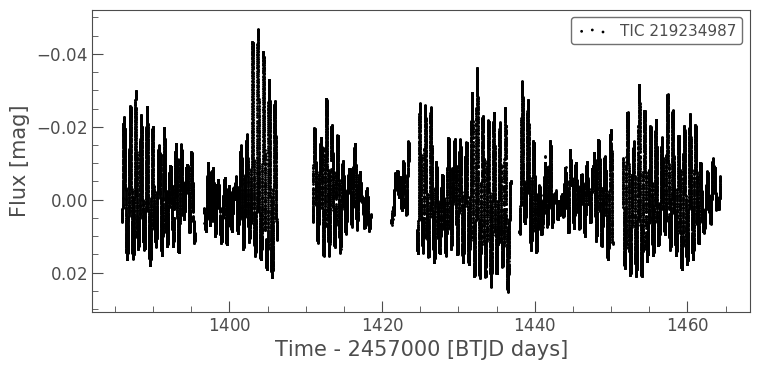

In [5]:
star.lc.scatter()

## Plotting periodograms

What is true for the LightCurve objects, is also true for the periodogram. To plot the periodogram, including the significant frequencies, you can use the plot_pdg function

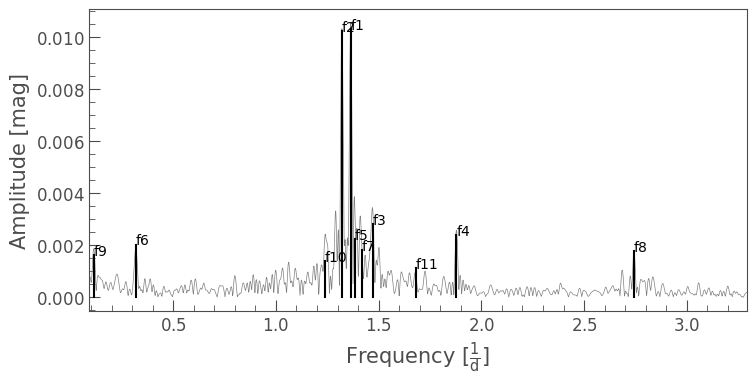

In [6]:
star.plot_pdg()

This of course restricts us to the range where significant frequencies have been found. If we want the whole periodogram, we can use the pdg property

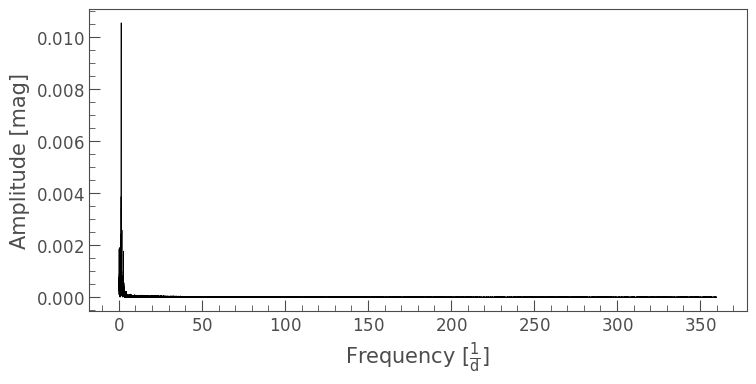

In [7]:
star.pdg.plot()

## The individual frequencies

As noted in previous chapters, the result property also contains all the individual frequencies. You can access them using iloc

In [8]:
star.result

,f_obj,frequency,amp,phase,snr,res_noise,significant
0,<smurfs._smurfs.frequency_finder.Frequency obj...,1.363741+/-0.000004,0.01033+/-0.00008,0.3267+/-0.0012,14.621918,-0.000890,True
1,<smurfs._smurfs.frequency_finder.Frequency obj...,1.321203+/-0.000004,0.01025+/-0.00008,1.2294+/-0.0012,17.646618,-0.000841,True
2,<smurfs._smurfs.frequency_finder.Frequency obj...,1.470777+/-0.000015,0.00281+/-0.00008,0.965+/-0.004,7.578344,-0.000855,True
3,<smurfs._smurfs.frequency_finder.Frequency obj...,1.878144+/-0.000017,0.00241+/-0.00008,0.517+/-0.005,6.717144,-0.000854,True
4,<smurfs._smurfs.frequency_finder.Frequency obj...,1.385307+/-0.000018,0.00223+/-0.00008,0.175+/-0.005,7.318523,-0.000865,True
5,<smurfs._smurfs.frequency_finder.Frequency obj...,0.316642+/-0.000020,0.00203+/-0.00008,0.254+/-0.006,5.597835,-0.000865,True
6,<smurfs._smurfs.frequency_finder.Frequency obj...,1.417226+/-0.000023,0.00181+/-0.00008,0.384+/-0.007,6.523381,-0.000859,True
7,<smurfs._smurfs.frequency_finder.Frequency obj...,2.742524+/-0.000023,0.00178+/-0.00008,0.943+/-0.007,9.558567,-0.000859,True
8,<smurfs._smurfs.frequency_finder.Frequency obj...,0.112357+/-0.000025,0.00163+/-0.00008,0.023+/-0.007,5.270446,-0.000856,True
9,<smurfs._smurfs.frequency_finder.Frequency obj...,1.237200+/-0.000029,0.00139+/-0.00008,0.091+/-0.009,5.176608,-0.000856,True


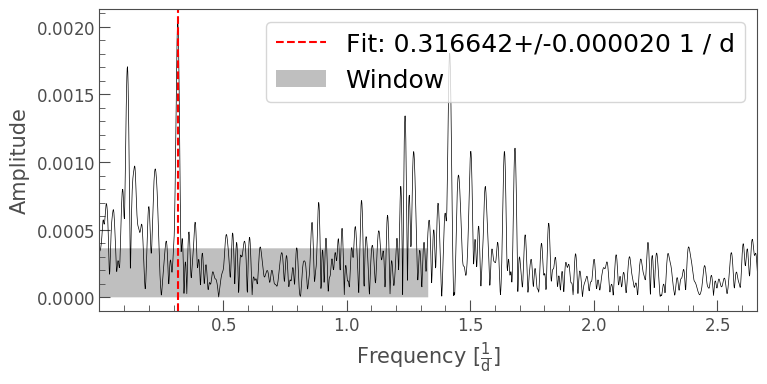

In [9]:
star.result.iloc[5].f_obj.plot()

To plot the corresponding light curve, we can access them through the corresponding property

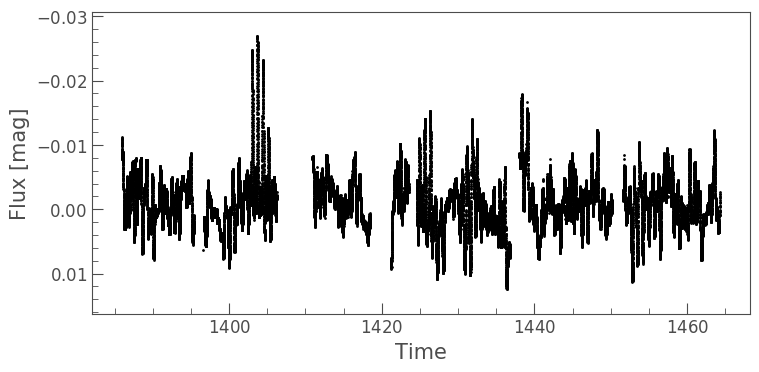

In [10]:
star.result.iloc[5].f_obj.lc.scatter()

We can also take a look at the whole periodogram

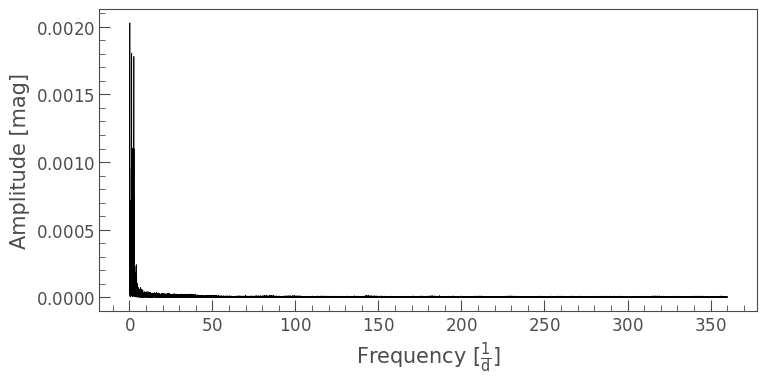

In [11]:
star.result.iloc[5].f_obj.pdg.plot()

We can also plot as many as we like here. For example the first three:

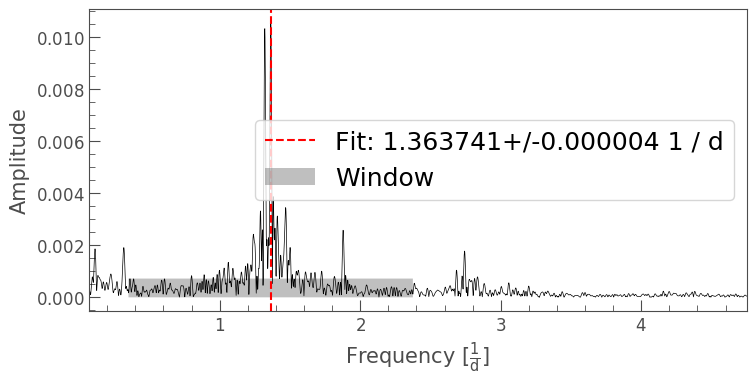

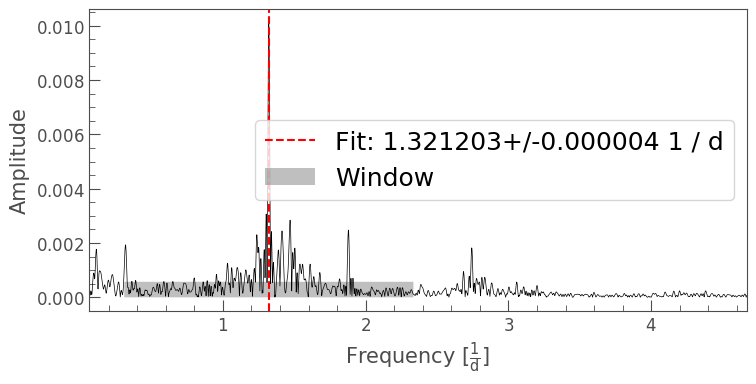

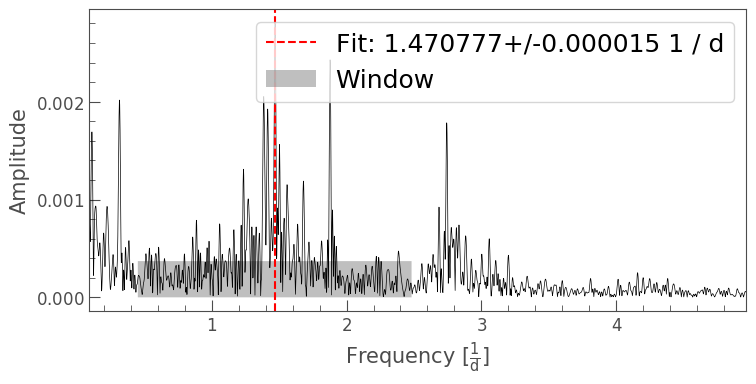

In [12]:
star.result.iloc[0].f_obj.plot()
star.result.iloc[1].f_obj.plot()
star.result.iloc[2].f_obj.plot()

## Plotting only part of the model

We might also be interested to only plot part of the model. For this, we copy the result from the smurfs object and restrict ourselves to the interesting frequencies:

In [14]:
model = star.result.iloc[[0,2,5]]

In [15]:
model

,f_obj,frequency,amp,phase,snr,res_noise,significant
0,<smurfs._smurfs.frequency_finder.Frequency obj...,1.363741+/-0.000004,0.01033+/-0.00008,0.3267+/-0.0012,14.621918,-0.000890,True
2,<smurfs._smurfs.frequency_finder.Frequency obj...,1.470777+/-0.000015,0.00281+/-0.00008,0.965+/-0.004,7.578344,-0.000855,True
5,<smurfs._smurfs.frequency_finder.Frequency obj...,0.316642+/-0.000020,0.00203+/-0.00008,0.254+/-0.006,5.597835,-0.000865,True


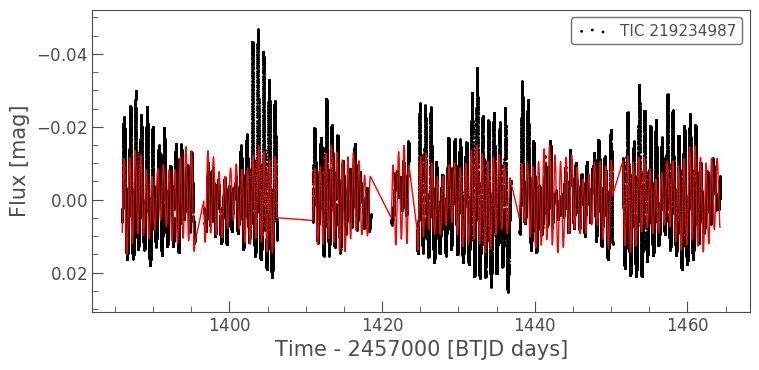

In [18]:
star.plot_lc(result=model)

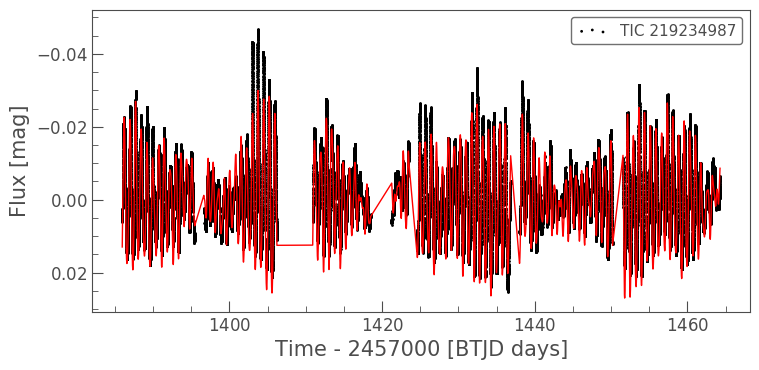

In [19]:
star.plot_lc()

You can of course use any filtering you like with pandas.